In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper

In [2]:
api_wrapper_res=ArxivAPIWrapper(top_k_results=2,load_max_docs=2)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_res)

In [3]:
arxiv.invoke("What is Thermodnamics laws")

'Published: 2013-05-29\nTitle: Obtaining Laws of Thermodynamics for Ideal Gases using Elastic Collisions\nAuthors: Stephen Montgomery-Smith, Hannah Morgan\nSummary: The purpose of this note is to see to what extent ideal gas laws can be\nobtained from simple Newtonian mechanics, specifically elastic collisions. We\npresent simple one-dimensional situations that seem to validate the laws. The\nfirst section describes a numerical simulation that demonstrates the second law\nof thermodynamics. The second section mathematically demonstrates the adiabatic\nlaw of expansion of ideal gases.\n\nPublished: 2021-07-21\nTitle: Do gravitational waves confirm Hawking\'s area law?\nAuthors: Galina Weinstein\nSummary: Recently an experiment has been performed for the purpose of "testing the\narea law with GW150914". As the experimenters put it, the experiment presents\n"observational confirmation" of Hawking\'s area law based on the GW150914 data.\nIt is the purpose of this paper to philosophically e

In [4]:
wiki_wrapper_res=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=1000)
wiki=WikipediaQueryRun(api_wrapper=wiki_wrapper_res)


In [5]:
wiki.invoke("Laws of thermodynamics")

'Page: Laws of thermodynamics\nSummary: The laws of thermodynamics are a set of scientific laws which define a group of physical quantities, such as temperature, energy, and entropy, that characterize thermodynamic systems in thermodynamic equilibrium. The laws also use various parameters for thermodynamic processes, such as thermodynamic work and heat, and establish relationships between them. They state empirical facts that form a basis of precluding the possibility of certain phenomena, such as perpetual motion. In addition to their use in thermodynamics, they are important fundamental laws of physics in general and are applicable in other natural sciences.\nTraditionally, thermodynamics has recognized three fundamental laws, simply named by an ordinal identification, the first law, the second law, and the third law. A more fundamental statement was later labelled as the zeroth law after the first three laws had been established.\nThe zeroth law of thermodynamics defines thermal equ

In [6]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCGAIN_PROJECT"]="ReAct_Architecture_Agent"

In [7]:
### Custom Functions
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools=[arxiv,wiki,add,multiply,divide]

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily =TavilySearchResults()
tavily.invoke("Provide me the news related to bike price hike in 2025 due to Gst reform ")

C:\Users\athar\AppData\Local\Temp\ipykernel_2972\3190612985.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily =TavilySearchResults()


[{'title': 'Small cars, bikes up to 350 cc to get cheaper as GST reforms kick in',
  'url': 'https://www.thehindu.com/business/Industry/small-cars-bikes-up-to-350-cc-to-get-cheaper-as-gst-reforms-kick-in/article70009731.ece',
  'content': 'Small cars, bikes up to 350 cc to get cheaper as GST reforms kick in - The Hindu\n\nSeptember 8, 2025e-Paper\n\nAccount\n\neBooksSubscribeGIFT FRONT PAGE\n\n# Small cars, bikes up to 350 cc to get cheaper as GST reforms kick in\n\n## Almost one-third of the passenger vehicles industry will see price reduction of 8.5%; Revised GST slabs to spur demand, help in auto sales especially in the festive season\n\nUpdated  - September 04, 2025 04:17 pm IST - MUMBAI\n\nLalatendu Mishra\n\nSEE ALL\nRemove [...] “We also appreciate the continuation of the 5% GST rate on EVs, which is a critical enabler of India’s clean mobility vision. This measure will further accelerate the adoption of electric vehicles and reinforce India’s leadership in sustainable, green tr

In [9]:
### Combine all the tools in the list

tools=[arxiv,wiki,tavily,add,divide,multiply]

In [10]:
from langchain_groq import ChatGroq


llm=ChatGroq(model="llama-3.1-8b-instant")
llm_with_tools=llm.bind_tools(tools)


In [11]:
from pprint import pprint
from langchain_core.messages import AIMessage,HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI news")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'mt150fx49', 'function': {'arguments': '{"query":"AI news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 744, 'total_tokens': 763, 'completion_time': 0.025736878, 'prompt_time': 0.044942514, 'queue_time': 0.289805075, 'total_time': 0.070679392}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8804b970d6', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--bcdf0f12-ae1f-4249-9257-999a9f4065b2-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'AI news'}, 'id': 'mt150fx49', 'type': 'tool_call'}], usage_metadata={'input_tokens': 744, 'output_tokens': 19, 'total_tokens': 763})

In [12]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI news")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'recent AI news'},
  'id': '09sa66j9k',
  'type': 'tool_call'}]

In [13]:
llm_with_tools.invoke([HumanMessage(content=f"Add 2 and 2 Divide it by 2 ")]).tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': '7p00rj0tz',
  'type': 'tool_call'},
 {'name': 'divide',
  'args': {'a': 4, 'b': 2},
  'id': 'nxwzhj12g',
  'type': 'tool_call'}]

In [14]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

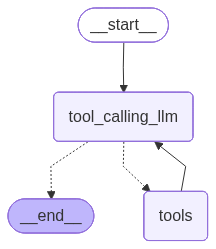

In [15]:
from IPython.display import Image,display
from langgraph.graph import StateGraph, START , END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

def tool_calling_llm(state:State):
    return{"messages":[llm_with_tools.invoke(state["messages"])]}

builder= StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
        tools_condition,
)

#Not to end
builder.add_edge("tools","tool_calling_llm")

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
messages=graph.invoke({"messages":HumanMessage(content="Give me latest news related to bike prices , add 5 plus 5 then multiply by 5")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Give me latest news related to bike prices , add 5 plus 5 then multiply by 5
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (5he3n9e7e)
 Call ID: 5he3n9e7e
  Args:
    query: latest bike prices news
  add (djncg5yt6)
 Call ID: djncg5yt6
  Args:
    a: 5
    b: 5
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "All New 2026 Road Bike: News, Info, Prices and Photos of the ...", "url": "https://www.cyclonline.com/bicycles-news/all-new-2026-road-bike-news,-info,-prices-and-photos-of-the-new-2026-road-and-racing-bicycles", "content": "Cyclonline.com\n\n# All New 2026 Road Bike: News, Info, Prices and Photos of the New 2026 Road and Racing Bicycles\n\nAll New 2026 Road Bike: News, Info, Prices and Photos of the New 2026 Road Bicycles: New 2026 Road Bikes, New 2

In [17]:
messages=graph.invoke({"messages":HumanMessage(content="What is use of a llm")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is use of a llm
================================== Ai Message ==================================
Tool Calls:
  wikipedia (cwej8fz4d)
 Call ID: cwej8fz4d
  Args:
    query: use of a llm
================================= Tool Message =================================
Name: wikipedia

Page: Large language model
Summary: A large language model (LLM) is a language model trained with self-supervised machine learning on a vast amount of text, designed for natural language processing tasks, especially language generation.
The largest and most capable LLMs are generative pre-trained transformers (GPTs), based on a transformer architecture, which are largely used in generative chatbots such as ChatGPT, Gemini and Claude. LLMs can be fine-tuned for specific tasks or guided by prompt engineering. These models acquire predictive power regarding syntax, semantics, and ontologies inherent in human language corpora,

In [18]:
messages=graph.invoke({"messages":HumanMessage(content="What is 5 plus 5 plus 890")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is 5 plus 5 plus 890
================================== Ai Message ==================================
Tool Calls:
  add (bycj5e6mn)
 Call ID: bycj5e6mn
  Args:
    a: 5
    b: 5
  add (8kyhms70h)
 Call ID: 8kyhms70h
  Args:
    a: 10
    b: 890
================================= Tool Message =================================
Name: add

10
================================= Tool Message =================================
Name: add

900
================================== Ai Message ==================================

The correct result is 900.


In [21]:
messages=[HumanMessage(content="Divide that by 9")]
messages=graph.invoke({"messages":messages})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Divide that by 9
================================== Ai Message ==================================

<divide>a=45</divide>


### Using Memory - Via Memory saver {"checkpoitner automaticaly"} ###

In [22]:
from IPython.display import Image,display
from langgraph.graph import StateGraph, START , END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

def tool_calling_llm(state:State):
    return{"messages":[llm_with_tools.invoke(state["messages"])]}

builder= StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
        tools_condition,
)

#Not to end
builder.add_edge("tools","tool_calling_llm")



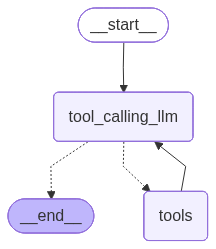

In [23]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
graph_wih_mem=builder.compile(checkpointer=memory)

display(Image(graph_wih_mem.get_graph().draw_mermaid_png()))

In [ ]:
##Specify the thread 

config={"configurable":{"thread_id":"1"}}
messages=[HumanMessage(content=("Add 133 and 78"))]
messages= graph_wih_mem.invoke({"messages":messages},config=config)
for m in messages["messages"]:
    m.pretty_print()


================================ Human Message =================================

Add 133 and 78
================================== Ai Message ==================================
Tool Calls:
  add (ftzywz1xw)
 Call ID: ftzywz1xw
  Args:
    a: 133
    b: 78
================================= Tool Message =================================
Name: add

211
================================== Ai Message ==================================

The result of the function call is 211, but it's a number, not a JSON object.


In [25]:
##Specify the thread 

messages=[HumanMessage(content=("Add that number to 25"))]
messages= graph_wih_mem.invoke({"messages":messages},config=config)
for m in messages["messages"]:
    m.pretty_print()


================================ Human Message =================================

Add 133 and 78
================================== Ai Message ==================================
Tool Calls:
  add (ftzywz1xw)
 Call ID: ftzywz1xw
  Args:
    a: 133
    b: 78
================================= Tool Message =================================
Name: add

211
================================== Ai Message ==================================

The result of the function call is 211, but it's a number, not a JSON object.
================================ Human Message =================================

Add that number to 25
================================== Ai Message ==================================
Tool Calls:
  add (1070yfskv)
 Call ID: 1070yfskv
  Args:
    a: 211
    b: 25
================================= Tool Message =================================
Name: add

236
================================== Ai Message ==================================

The result of the function call is 236.
